# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("sinasc_RO_2019.csv")

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [12]:
df.loc[df['APGAR5'] <= 3,'CATEGORIA'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) &(df['APGAR5'] <= 5),'CATEGORIA'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) &(df['APGAR5'] <= 7),'CATEGORIA'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8) &(df['APGAR5'] <= 10),'CATEGORIA'] = 'normal'
df['CATEGORIA'].value_counts()


normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: CATEGORIA, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

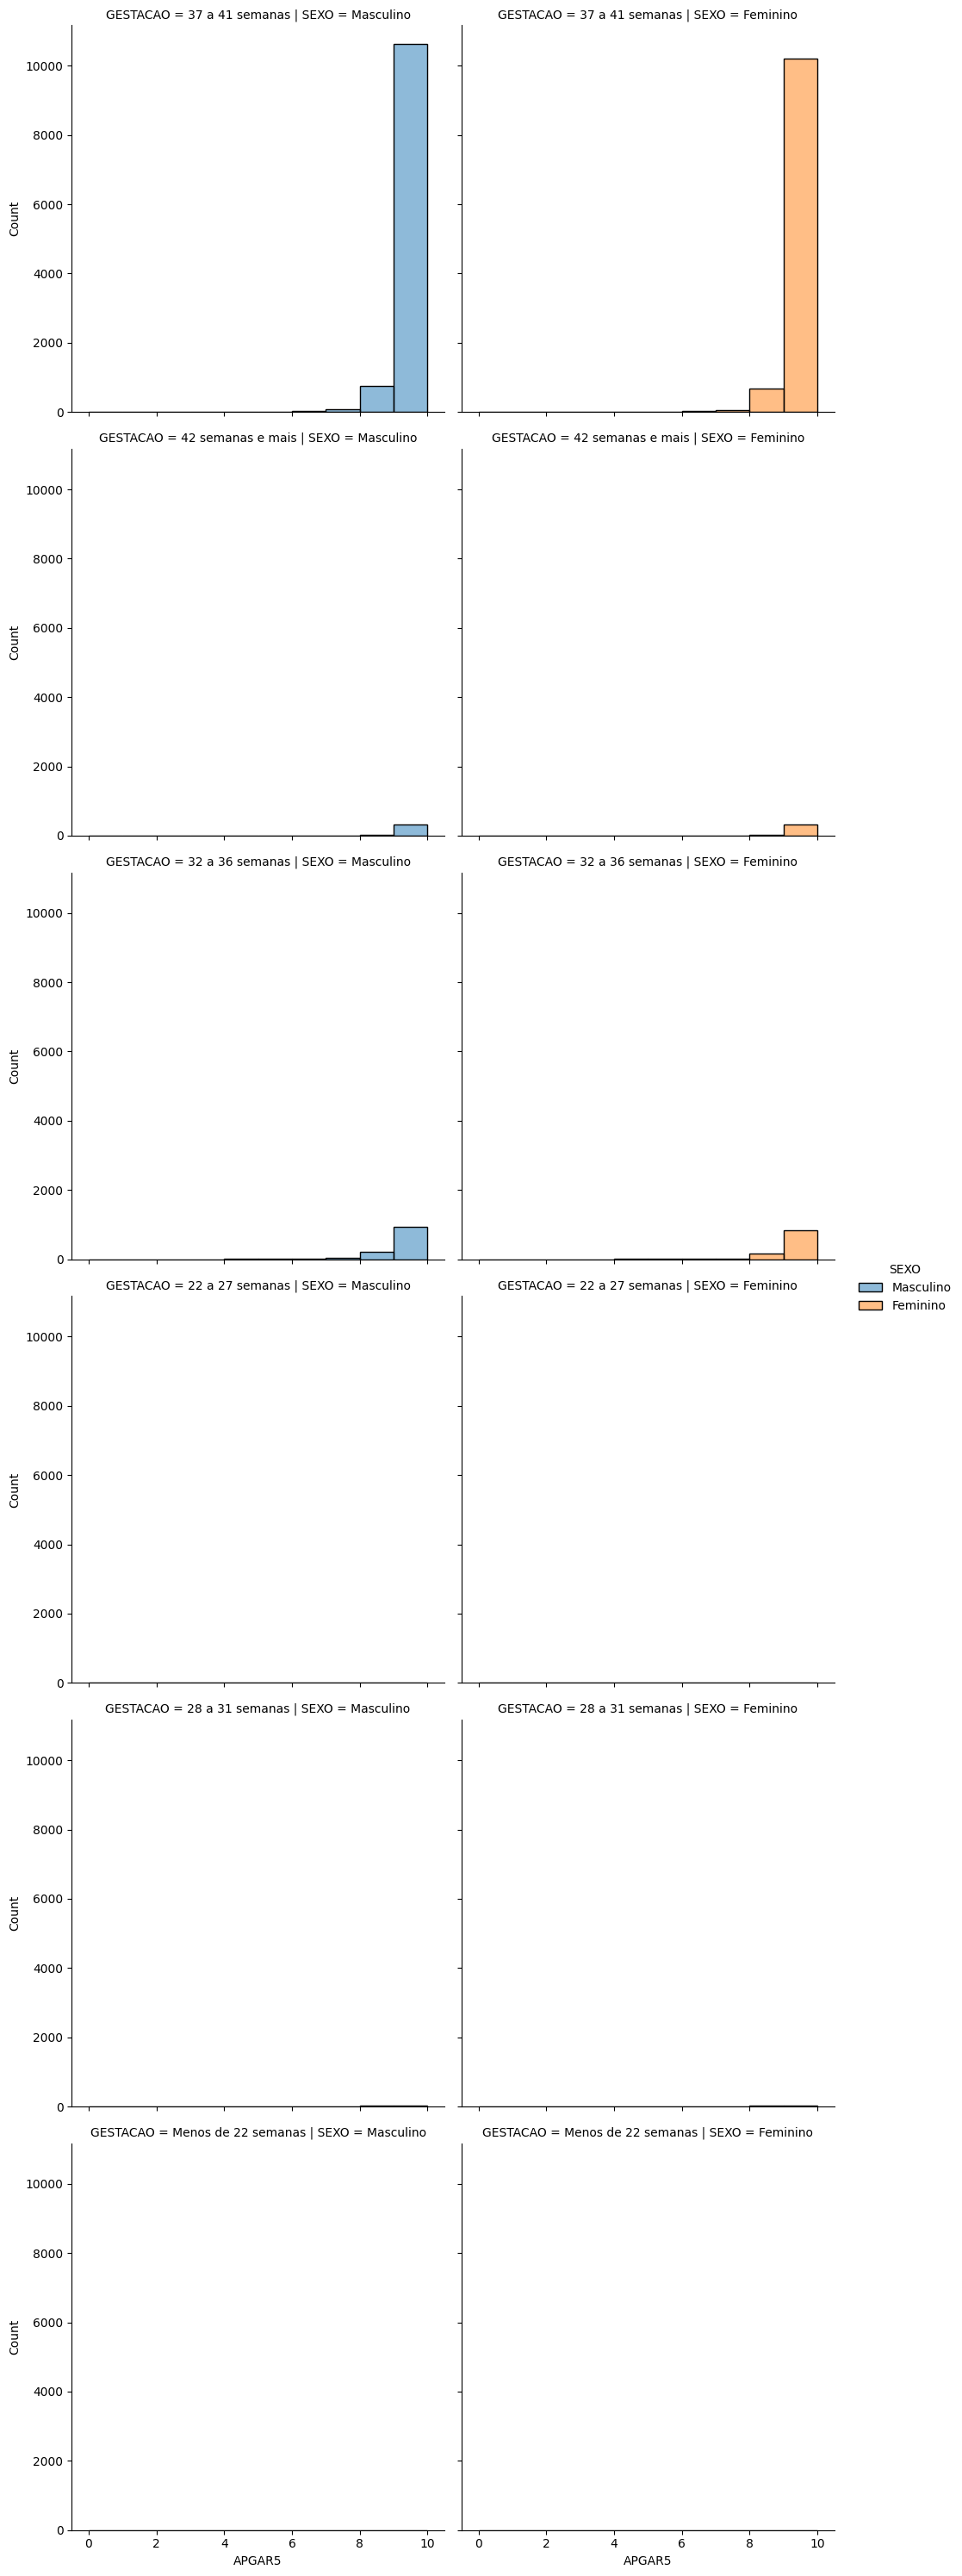

In [81]:
sns.displot(df, x='APGAR5', col='SEXO', hue='SEXO', row='GESTACAO', bins=10)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

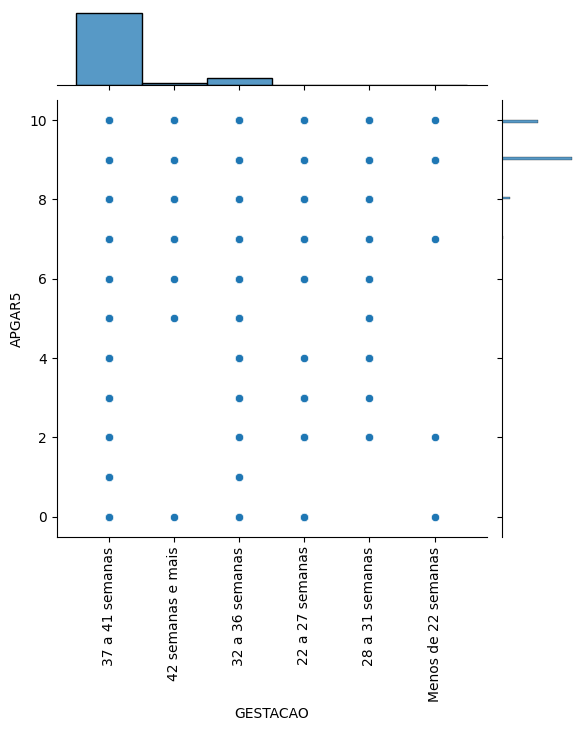

In [40]:
sns.jointplot(df, x='GESTACAO', y='APGAR5')
plt.xticks(rotation=90)

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [51]:
freq = pd.crosstab(df['CATEGORIA'], df['GESTACAO'])
freq_percent = freq.div(freq.sum(axis=1), axis=0)
freq_percent

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
CATEGORIA,,,,,,
asfixia grave,0.308824,0.044118,0.117647,0.485294,0.014706,0.029412
asfixia leve,0.039216,0.058824,0.238562,0.640523,0.019608,0.003268
asfixia moderada,0.016393,0.196721,0.311475,0.459016,0.016393,0.000000
normal,0.002018,0.005104,0.084435,0.880984,0.027301,0.000158


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

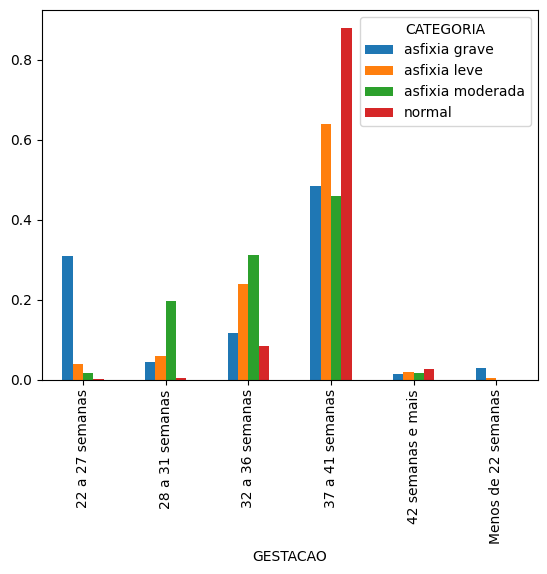

In [52]:
freq_percent.T.plot.bar()

#### Resposta
Pelo gráfico se observa que nos casos de gestação abaixo de 37 semanas, o percentual de APGAR5 considerado normal diminui bastante, ficando sempre menor do que os casos de asfixia.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

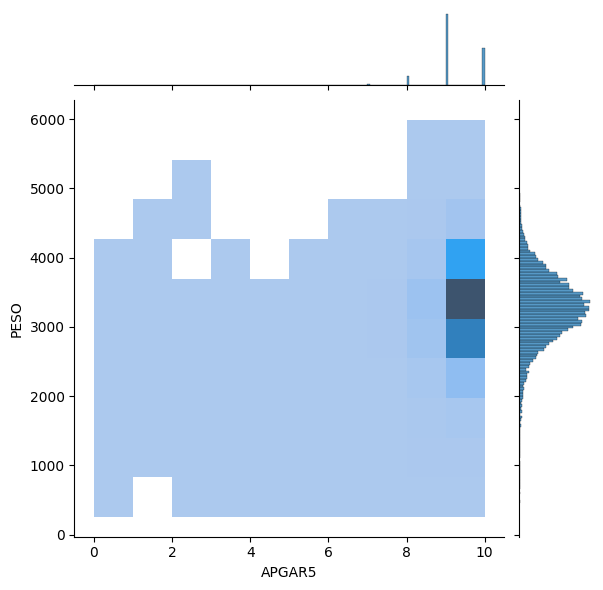

In [87]:
sns.jointplot(df, x='APGAR5', y='PESO', kind='hist', bins=10)

<Axes: xlabel='APGAR5', ylabel='PESO'>

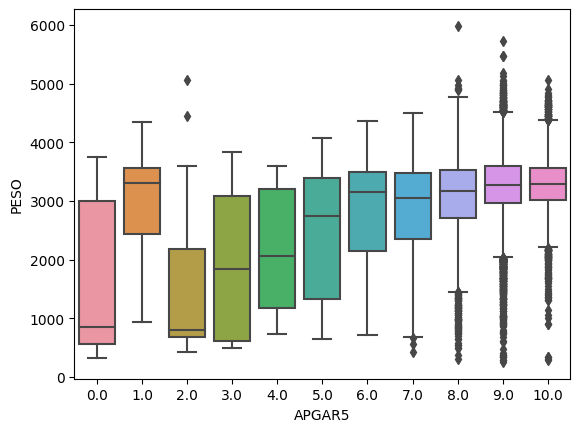

In [84]:
sns.boxplot(df, x='APGAR5', y='PESO')

#### Resposta

No primeiro gráfico podemos observar que existe uma frequência maior de peso entre 3kg e 4kg e APGAR5 entre 8 e 10.
No segundo gráfico é possível perceber que à medida que APGAR5 se aproxima de 10, existe uma variação menor no peso e diminui a quantidade de bebês com pesos muito pequenos.